### Optuna is an open source hyperparameter optimization framework to automate hyperparameter search

### This code will use Optuna to search through the hyperparameter space and find the best combination of parameters for the GradientBoostingRegressor model. The code will print the best parameters, as well as the mean absolute error on the test data.

In [ ]:
#First time installation
#!pip install optuna

In [1]:
import pandas
import numpy as np
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import optuna
from time import time

In [2]:
# Load the data set
df = pandas.read_csv("ml_house_data_set.csv")

# Remove the fields from the data set that we don't want to include in our model
del df['house_number']
del df['unit_number']
del df['street_name']
del df['zip_code']

# Replace categorical data with one-hot encoded data
features_df = pandas.get_dummies(df, columns=['garage_type', 'city'])
del features_df['sale_price']

X = features_df.values
y = df['sale_price'].values

# Split the data set in a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [3]:
# Record the start time
start=time()

# Create a dictionary to record the speed
speed={}

# Create the model
model = ensemble.GradientBoostingRegressor()

# Define the objective function
"""The objective function is a function that takes a set of hyperparameters as input and 
returns a value that represents the quality of the model. """
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 3000),
        'max_depth': trial.suggest_int('max_depth', 4, 6),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 3, 17),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_features': trial.suggest_float('max_features', 0.1, 0.6),
        'loss': trial.suggest_categorical('loss', ['absolute_error', 'squared_error', 'huber'])
                                            }

    model.set_params(**params)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Calculate the mean absolute error on the test data
    mae = mean_absolute_error(y_test, model.predict(X_test))

    return mae

# Run the optimization
"""
creates a new study in Optuna. 
A study is a container for the trials that are run during the optimization process.
Once you have created a study, you can use it to run trials. 
The trials are the individual runs of the optimization process. 
Each trial will try a different set of hyperparameters and the objective function 
will be evaluated on the test data. The best set of hyperparameters will be the set 
that results in the minimum value of the objective function.
"""
study = optuna.create_study()

"""
The value of n_trials is the number of times that Optuna will try 
to find a better set of hyperparameters. In our code, we have set n_trials to 100. 
This means that Optuna will try 100 different combinations of hyperparameters to 
find the best set of hyperparameters.
The value of n_trials is a trade-off between the amount of time that you want to 
spend optimizing the hyperparameters and the quality of the results. 
If you set n_trials to a high value, Optuna will be able to search a wider range 
of hyperparameters and find a better set of hyperparameters. 
However, it will also take longer to run the optimization.
"""
study.optimize(objective, n_trials=100)

# Print the best parameters
print(study.best_params)

# Record the time needed to run and accuracy in the respective dictionaries
speed['GradientBoosting'] = np.round(time()-start, 3)

# Print the results - mean accuracy, standard deviation and run time
print(f"Run time: {speed['GradientBoosting']}s")


[I 2023-08-03 09:46:13,432] A new study created in memory with name: no-name-36a4ea24-6133-48cb-812d-919a6772dcab
[I 2023-08-03 09:46:51,139] Trial 0 finished with value: 59339.50337258314 and parameters: {'n_estimators': 949, 'max_depth': 6, 'min_samples_leaf': 14, 'learning_rate': 0.06421327824887542, 'max_features': 0.2990306137900771, 'loss': 'absolute_error'}. Best is trial 0 with value: 59339.50337258314.
[I 2023-08-03 09:47:41,738] Trial 1 finished with value: 61015.20648487903 and parameters: {'n_estimators': 1782, 'max_depth': 6, 'min_samples_leaf': 7, 'learning_rate': 0.012175565950102893, 'max_features': 0.17153619701871772, 'loss': 'absolute_error'}. Best is trial 0 with value: 59339.50337258314.
[I 2023-08-03 09:48:58,108] Trial 2 finished with value: 58969.91170460606 and parameters: {'n_estimators': 1808, 'max_depth': 6, 'min_samples_leaf': 13, 'learning_rate': 0.051532218591568556, 'max_features': 0.31617897756301205, 'loss': 'absolute_error'}. Best is trial 2 with valu

[I 2023-08-03 10:33:10,113] Trial 28 finished with value: 58384.259446789896 and parameters: {'n_estimators': 2468, 'max_depth': 5, 'min_samples_leaf': 4, 'learning_rate': 0.06414718956613355, 'max_features': 0.39646181760394544, 'loss': 'huber'}. Best is trial 24 with value: 58281.77866446808.
[I 2023-08-03 10:34:08,491] Trial 29 finished with value: 62866.90641711525 and parameters: {'n_estimators': 1977, 'max_depth': 5, 'min_samples_leaf': 6, 'learning_rate': 0.06264727550876513, 'max_features': 0.2926029278769814, 'loss': 'squared_error'}. Best is trial 24 with value: 58281.77866446808.
[I 2023-08-03 10:35:40,083] Trial 30 finished with value: 59505.43508311096 and parameters: {'n_estimators': 2690, 'max_depth': 4, 'min_samples_leaf': 4, 'learning_rate': 0.06482147292199093, 'max_features': 0.3322167384175601, 'loss': 'huber'}. Best is trial 24 with value: 58281.77866446808.
[I 2023-08-03 10:37:49,011] Trial 31 finished with value: 58937.04906132947 and parameters: {'n_estimators':

[I 2023-08-03 11:39:41,095] Trial 56 finished with value: 58674.07001225787 and parameters: {'n_estimators': 2361, 'max_depth': 6, 'min_samples_leaf': 6, 'learning_rate': 0.03856772185789686, 'max_features': 0.3930850737544588, 'loss': 'absolute_error'}. Best is trial 41 with value: 57779.70562079576.
[I 2023-08-03 11:43:23,536] Trial 57 finished with value: 57826.95225459182 and parameters: {'n_estimators': 2680, 'max_depth': 6, 'min_samples_leaf': 3, 'learning_rate': 0.05245663031151678, 'max_features': 0.4765080281702976, 'loss': 'huber'}. Best is trial 41 with value: 57779.70562079576.
[I 2023-08-03 11:46:55,690] Trial 58 finished with value: 57684.20163343818 and parameters: {'n_estimators': 2700, 'max_depth': 6, 'min_samples_leaf': 3, 'learning_rate': 0.052556744506316866, 'max_features': 0.47856020024029455, 'loss': 'huber'}. Best is trial 58 with value: 57684.20163343818.
[I 2023-08-03 11:50:33,327] Trial 59 finished with value: 57848.79977564603 and parameters: {'n_estimators'

[I 2023-08-03 14:19:05,873] Trial 84 finished with value: 57683.96445137338 and parameters: {'n_estimators': 2857, 'max_depth': 6, 'min_samples_leaf': 4, 'learning_rate': 0.06589415415523991, 'max_features': 0.4862179785973081, 'loss': 'huber'}. Best is trial 61 with value: 57423.272310355555.
[I 2023-08-03 14:21:48,998] Trial 85 finished with value: 57664.09768599487 and parameters: {'n_estimators': 2957, 'max_depth': 6, 'min_samples_leaf': 3, 'learning_rate': 0.06038581760006205, 'max_features': 0.5378904506006817, 'loss': 'huber'}. Best is trial 61 with value: 57423.272310355555.
[I 2023-08-03 14:24:33,225] Trial 86 finished with value: 57744.09121842349 and parameters: {'n_estimators': 2769, 'max_depth': 6, 'min_samples_leaf': 3, 'learning_rate': 0.05700579786134743, 'max_features': 0.5468095082930687, 'loss': 'huber'}. Best is trial 61 with value: 57423.272310355555.
[I 2023-08-03 14:26:29,336] Trial 87 finished with value: 61348.79759590552 and parameters: {'n_estimators': 2634, 

{'n_estimators': 2913, 'max_depth': 6, 'min_samples_leaf': 3, 'learning_rate': 0.052662382313578934, 'max_features': 0.48540540746916366, 'loss': 'huber'}
Run time: 20291.771s


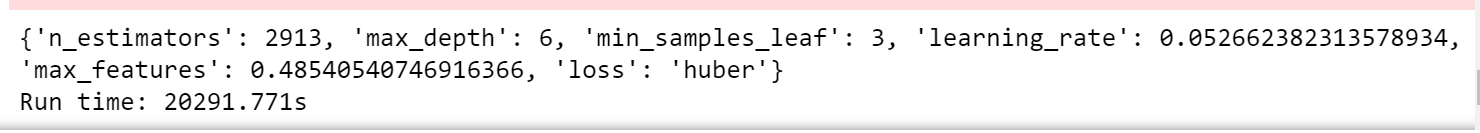

In [4]:
best_params = study.best_params

# Set the parameters of the model to the best parameters
model.set_params(**best_params)

# Calculate the MAE on the training data
mae_train = mean_absolute_error(y_train, model.predict(X_train))

# Calculate the MAE on the testing data
mae_test = mean_absolute_error(y_test, model.predict(X_test))

print("MAE on training data:", mae_train)
print("MAE on testing data:", mae_test)


MAE on training data: 61912.90428502095
MAE on testing data: 72480.0462959024


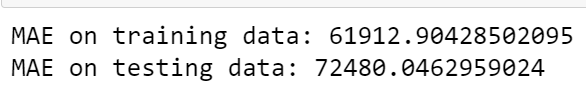

### Using LightGBM

In [14]:
import lightgbm as lgb

# Record the start time
start = time()

# Create a dictionary to record the speed
speed = {}

# Create the model
model = lgb.LGBMRegressor()

# Define the objective function
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 3000),
        'max_depth': trial.suggest_int('max_depth', 4, 6),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 3, 17),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_features': trial.suggest_float('max_features', 0.1, 0.6),
    }

    model.set_params(**params)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Calculate the mean absolute error on the test data
    mae = mean_absolute_error(y_test, model.predict(X_test))

    return mae

# Run the optimization
study = optuna.create_study()
study.optimize(objective, n_trials=100)

# Print the best parameters
print(study.best_params)

# Record the time needed to run and accuracy in the respective dictionaries
speed['LightGBM'] = np.round(time() - start, 3)

# Print the results - mean accuracy, standard deviation and run time
print(f"Run time: {speed['LightGBM']}s")


best_params = study.best_params

# Set the parameters of the model to the best parameters
model.set_params(**best_params)

# Calculate the MAE on the training data
mae_train = mean_absolute_error(y_train, model.predict(X_train))

# Calculate the MAE on the testing data
mae_test = mean_absolute_error(y_test, model.predict(X_test))

print("MAE on training data:", mae_train)
print("MAE on testing data:", mae_test)


[I 2023-08-02 15:43:05,383] A new study created in memory with name: no-name-3bcfeae3-f58d-4282-93b8-38dffb9abb06


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:43:10,609] Trial 0 finished with value: 64752.88083075507 and parameters: {'n_estimators': 2959, 'max_depth': 4, 'min_samples_leaf': 11, 'learning_rate': 0.04038589850924375, 'max_features': 0.2559297308295052}. Best is trial 0 with value: 64752.88083075507.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:43:17,874] Trial 1 finished with value: 64385.45470351176 and parameters: {'n_estimators': 2758, 'max_depth': 6, 'min_samples_leaf': 12, 'learning_rate': 0.07654958337559147, 'max_features': 0.11419877947347637}. Best is trial 1 with value: 64385.45470351176.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:43:24,232] Trial 2 finished with value: 63901.78531081293 and parameters: {'n_estimators': 2302, 'max_depth': 6, 'min_samples_leaf': 12, 'learning_rate': 0.015621649723035726, 'max_features': 0.23784211238780847}. Best is trial 2 with value: 63901.78531081293.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:43:30,831] Trial 3 finished with value: 64586.0764424965 and parameters: {'n_estimators': 2947, 'max_depth': 5, 'min_samples_leaf': 12, 'learning_rate': 0.060184836602684075, 'max_features': 0.5071750944852176}. Best is trial 2 with value: 63901.78531081293.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=14. Current value: min_data_in_leaf=14
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:43:32,606] Trial 4 finished with value: 64044.89245158508 and parameters: {'n_estimators': 549, 'max_depth': 6, 'min_samples_leaf': 14, 'learning_rate': 0.052313300328379386, 'max_features': 0.3701004162199656}. Best is trial 2 with value: 63901.78531081293.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=14. Current value: min_data_in_leaf=14
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:43:36,075] Trial 5 finished with value: 64507.915584456714 and parameters: {'n_estimators': 1548, 'max_depth': 5, 'min_samples_leaf': 14, 'learning_rate': 0.06612600260518516, 'max_features': 0.2840011517624178}. Best is trial 2 with value: 63901.78531081293.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=14. Current value: min_data_in_leaf=14
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:43:40,280] Trial 6 finished with value: 65454.49797979667 and parameters: {'n_estimators': 2381, 'max_depth': 4, 'min_samples_leaf': 14, 'learning_rate': 0.09057943916575904, 'max_features': 0.2566850606443648}. Best is trial 2 with value: 63901.78531081293.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:43:44,084] Trial 7 finished with value: 63562.15711132019 and parameters: {'n_estimators': 1244, 'max_depth': 6, 'min_samples_leaf': 11, 'learning_rate': 0.07119751586978008, 'max_features': 0.3374914518516322}. Best is trial 7 with value: 63562.15711132019.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:43:46,297] Trial 8 finished with value: 64702.06513757533 and parameters: {'n_estimators': 925, 'max_depth': 5, 'min_samples_leaf': 12, 'learning_rate': 0.09409825069345928, 'max_features': 0.2846042727391457}. Best is trial 7 with value: 63562.15711132019.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=13. Current value: min_data_in_leaf=13
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:43:49,428] Trial 9 finished with value: 65364.514590082326 and parameters: {'n_estimators': 1741, 'max_depth': 4, 'min_samples_leaf': 13, 'learning_rate': 0.053070110705070145, 'max_features': 0.2395206904665013}. Best is trial 7 with value: 63562.15711132019.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=17. Current value: min_data_in_leaf=17
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:43:52,823] Trial 10 finished with value: 64445.94433715078 and parameters: {'n_estimators': 1177, 'max_depth': 6, 'min_samples_leaf': 17, 'learning_rate': 0.07662471792889314, 'max_features': 0.5538587517479401}. Best is trial 7 with value: 63562.15711132019.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:43:59,182] Trial 11 finished with value: 63650.97785738819 and parameters: {'n_estimators': 2267, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.012812037673551874, 'max_features': 0.40569954695978305}. Best is trial 7 with value: 63562.15711132019.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:44:04,914] Trial 12 finished with value: 64003.02805473396 and parameters: {'n_estimators': 1999, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.01005051578494605, 'max_features': 0.4200485346329519}. Best is trial 7 with value: 63562.15711132019.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:44:09,196] Trial 13 finished with value: 63798.828636068705 and parameters: {'n_estimators': 1471, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.03018889596105278, 'max_features': 0.44517107513639714}. Best is trial 7 with value: 63562.15711132019.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:44:13,987] Trial 14 finished with value: 64062.08363081813 and parameters: {'n_estimators': 2078, 'max_depth': 5, 'min_samples_leaf': 10, 'learning_rate': 0.027218792927855402, 'max_features': 0.34754317280006264}. Best is trial 7 with value: 63562.15711132019.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:44:17,416] Trial 15 finished with value: 64143.107880040014 and parameters: {'n_estimators': 1136, 'max_depth': 6, 'min_samples_leaf': 16, 'learning_rate': 0.041900488467128426, 'max_features': 0.4743749646809361}. Best is trial 7 with value: 63562.15711132019.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:44:23,089] Trial 16 finished with value: 64129.36169080086 and parameters: {'n_estimators': 2496, 'max_depth': 5, 'min_samples_leaf': 11, 'learning_rate': 0.02044921772661528, 'max_features': 0.38354211490862355}. Best is trial 7 with value: 63562.15711132019.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:44:24,904] Trial 17 finished with value: 64023.65077597365 and parameters: {'n_estimators': 532, 'max_depth': 6, 'min_samples_leaf': 11, 'learning_rate': 0.03840700140862337, 'max_features': 0.5776897405399972}. Best is trial 7 with value: 63562.15711132019.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=15. Current value: min_data_in_leaf=15
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:44:30,334] Trial 18 finished with value: 64088.37819350806 and parameters: {'n_estimators': 1971, 'max_depth': 6, 'min_samples_leaf': 15, 'learning_rate': 0.02010531809978535, 'max_features': 0.5037951964073938}. Best is trial 7 with value: 63562.15711132019.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:44:33,982] Trial 19 finished with value: 63977.09599839351 and parameters: {'n_estimators': 1461, 'max_depth': 5, 'min_samples_leaf': 10, 'learning_rate': 0.030594384026891533, 'max_features': 0.4179607294215957}. Best is trial 7 with value: 63562.15711132019.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=13. Current value: min_data_in_leaf=13
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:44:36,169] Trial 20 finished with value: 64483.59670032346 and parameters: {'n_estimators': 889, 'max_depth': 5, 'min_samples_leaf': 13, 'learning_rate': 0.046289322570361946, 'max_features': 0.32818497975802896}. Best is trial 7 with value: 63562.15711132019.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:44:40,640] Trial 21 finished with value: 64572.918084131335 and parameters: {'n_estimators': 1484, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.010065777941995525, 'max_features': 0.44744684227979764}. Best is trial 7 with value: 63562.15711132019.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:44:45,687] Trial 22 finished with value: 63976.03679184784 and parameters: {'n_estimators': 1760, 'max_depth': 6, 'min_samples_leaf': 11, 'learning_rate': 0.029663729478963084, 'max_features': 0.4193714092475825}. Best is trial 7 with value: 63562.15711132019.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:44:49,641] Trial 23 finished with value: 63508.94100496264 and parameters: {'n_estimators': 1242, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.025974057044376418, 'max_features': 0.38351333398375337}. Best is trial 23 with value: 63508.94100496264.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:44:53,175] Trial 24 finished with value: 63957.99151259266 and parameters: {'n_estimators': 1186, 'max_depth': 6, 'min_samples_leaf': 11, 'learning_rate': 0.020879076350292545, 'max_features': 0.37765611177306635}. Best is trial 23 with value: 63508.94100496264.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:44:55,774] Trial 25 finished with value: 63894.319095352424 and parameters: {'n_estimators': 854, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.036616980001343946, 'max_features': 0.32882458083060695}. Best is trial 23 with value: 63508.94100496264.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:44:59,687] Trial 26 finished with value: 63691.402932499266 and parameters: {'n_estimators': 1341, 'max_depth': 6, 'min_samples_leaf': 11, 'learning_rate': 0.024266217884190932, 'max_features': 0.39371235636437485}. Best is trial 23 with value: 63508.94100496264.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=13. Current value: min_data_in_leaf=13
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:45:04,420] Trial 27 finished with value: 64917.00809330099 and parameters: {'n_estimators': 1764, 'max_depth': 5, 'min_samples_leaf': 13, 'learning_rate': 0.014478493122461583, 'max_features': 0.3323549080923394}. Best is trial 23 with value: 63508.94100496264.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:45:11,419] Trial 28 finished with value: 63591.23949343438 and parameters: {'n_estimators': 2618, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.03306688897646408, 'max_features': 0.4623036863916904}. Best is trial 23 with value: 63508.94100496264.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:45:16,027] Trial 29 finished with value: 64699.1874491065 and parameters: {'n_estimators': 2589, 'max_depth': 4, 'min_samples_leaf': 12, 'learning_rate': 0.046232077119855275, 'max_features': 0.5998550211020589}. Best is trial 23 with value: 63508.94100496264.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:45:18,413] Trial 30 finished with value: 63962.78921314083 and parameters: {'n_estimators': 740, 'max_depth': 6, 'min_samples_leaf': 11, 'learning_rate': 0.03345252809230397, 'max_features': 0.46875182406996224}. Best is trial 23 with value: 63508.94100496264.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:45:24,666] Trial 31 finished with value: 63670.13095964629 and parameters: {'n_estimators': 2262, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.02511264673309762, 'max_features': 0.41392563346146705}. Best is trial 23 with value: 63508.94100496264.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:45:31,730] Trial 32 finished with value: 63341.037181219406 and parameters: {'n_estimators': 2669, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.03533720108206093, 'max_features': 0.36100647435505245}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:45:39,611] Trial 33 finished with value: 63548.67085561048 and parameters: {'n_estimators': 2748, 'max_depth': 6, 'min_samples_leaf': 11, 'learning_rate': 0.03519621823655995, 'max_features': 0.37286304935622716}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:45:47,251] Trial 34 finished with value: 63936.20606008792 and parameters: {'n_estimators': 2959, 'max_depth': 6, 'min_samples_leaf': 12, 'learning_rate': 0.04119822571197158, 'max_features': 0.35376673157168526}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:45:54,883] Trial 35 finished with value: 63979.36803463592 and parameters: {'n_estimators': 2738, 'max_depth': 6, 'min_samples_leaf': 12, 'learning_rate': 0.036980827329468766, 'max_features': 0.30044693724243343}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:46:02,200] Trial 36 finished with value: 64057.939348064145 and parameters: {'n_estimators': 2808, 'max_depth': 6, 'min_samples_leaf': 11, 'learning_rate': 0.0599851607425349, 'max_features': 0.35544472719242776}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:46:05,350] Trial 37 finished with value: 63789.8666431733 and parameters: {'n_estimators': 1069, 'max_depth': 6, 'min_samples_leaf': 12, 'learning_rate': 0.04745062595629182, 'max_features': 0.2068667076151388}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:46:08,568] Trial 38 finished with value: 64049.847056673425 and parameters: {'n_estimators': 1287, 'max_depth': 5, 'min_samples_leaf': 11, 'learning_rate': 0.06769971286794389, 'max_features': 0.3791552596569035}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:46:17,038] Trial 39 finished with value: 63791.93132575983 and parameters: {'n_estimators': 2849, 'max_depth': 6, 'min_samples_leaf': 11, 'learning_rate': 0.034841176176221546, 'max_features': 0.3072359352015434}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=13. Current value: min_data_in_leaf=13
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:46:18,982] Trial 40 finished with value: 65909.57209887299 and parameters: {'n_estimators': 708, 'max_depth': 5, 'min_samples_leaf': 13, 'learning_rate': 0.018146118658284388, 'max_features': 0.36957948275729985}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:46:26,437] Trial 41 finished with value: 63828.11939574692 and parameters: {'n_estimators': 2634, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.025527348134074077, 'max_features': 0.3886939600714722}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:46:33,611] Trial 42 finished with value: 63551.15397555536 and parameters: {'n_estimators': 2658, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.03315168763406498, 'max_features': 0.3509507411639251}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:46:40,423] Trial 43 finished with value: 63666.32365800484 and parameters: {'n_estimators': 2450, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.04073007588163306, 'max_features': 0.34855331803628253}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:46:46,217] Trial 44 finished with value: 63758.727257834376 and parameters: {'n_estimators': 2139, 'max_depth': 6, 'min_samples_leaf': 11, 'learning_rate': 0.030071893773186635, 'max_features': 0.31201451663385676}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:46:50,930] Trial 45 finished with value: 63757.04621830127 and parameters: {'n_estimators': 1639, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.02357181909413148, 'max_features': 0.2670391382839673}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:46:59,024] Trial 46 finished with value: 64039.34247639305 and parameters: {'n_estimators': 2889, 'max_depth': 6, 'min_samples_leaf': 12, 'learning_rate': 0.01659095823947611, 'max_features': 0.3618575840438986}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:47:06,959] Trial 47 finished with value: 63780.67270582825 and parameters: {'n_estimators': 2985, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.05527868430925274, 'max_features': 0.4003856268037099}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:47:14,476] Trial 48 finished with value: 63641.04858935416 and parameters: {'n_estimators': 2684, 'max_depth': 6, 'min_samples_leaf': 11, 'learning_rate': 0.027399743304124258, 'max_features': 0.28611287700876864}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=17. Current value: min_data_in_leaf=17
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:47:20,873] Trial 49 finished with value: 64109.89526101024 and parameters: {'n_estimators': 2378, 'max_depth': 6, 'min_samples_leaf': 17, 'learning_rate': 0.034319776528769094, 'max_features': 0.33978743990648336}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=15. Current value: min_data_in_leaf=15
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:47:22,885] Trial 50 finished with value: 65245.63775893506 and parameters: {'n_estimators': 1002, 'max_depth': 4, 'min_samples_leaf': 15, 'learning_rate': 0.038236910218251645, 'max_features': 0.4341312865301162}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:47:30,219] Trial 51 finished with value: 63573.27142833692 and parameters: {'n_estimators': 2543, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.0317406017806475, 'max_features': 0.36382579036589024}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:47:36,948] Trial 52 finished with value: 63734.906561640535 and parameters: {'n_estimators': 2515, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.04425870534574239, 'max_features': 0.3716696932696919}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:47:42,213] Trial 53 finished with value: 63920.22180425258 and parameters: {'n_estimators': 1924, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.02857387600139272, 'max_features': 0.3961568749577409}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:47:49,464] Trial 54 finished with value: 63751.25399168375 and parameters: {'n_estimators': 2717, 'max_depth': 6, 'min_samples_leaf': 11, 'learning_rate': 0.03133787140425809, 'max_features': 0.3247839916710297}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:47:56,330] Trial 55 finished with value: 63508.227065255785 and parameters: {'n_estimators': 2540, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.0378796287448232, 'max_features': 0.3578179012133882}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:48:03,329] Trial 56 finished with value: 63742.528520186774 and parameters: {'n_estimators': 2399, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.038218985041918896, 'max_features': 0.33940704380273157}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:48:08,379] Trial 57 finished with value: 64243.16692718927 and parameters: {'n_estimators': 2250, 'max_depth': 5, 'min_samples_leaf': 11, 'learning_rate': 0.04942639140051261, 'max_features': 0.3142135109788956}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:48:12,252] Trial 58 finished with value: 63618.55079965365 and parameters: {'n_estimators': 1325, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.04287999014725132, 'max_features': 0.40273444745004644}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:48:20,251] Trial 59 finished with value: 63764.21844307514 and parameters: {'n_estimators': 2837, 'max_depth': 6, 'min_samples_leaf': 11, 'learning_rate': 0.02171316053452539, 'max_features': 0.3811555566251261}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:48:25,748] Trial 60 finished with value: 63845.77721866051 and parameters: {'n_estimators': 1876, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.02706829161030943, 'max_features': 0.42730771905857245}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:48:32,926] Trial 61 finished with value: 63613.79988340961 and parameters: {'n_estimators': 2549, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.032870004425848684, 'max_features': 0.3618068711739395}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:48:40,187] Trial 62 finished with value: 63654.46330690905 and parameters: {'n_estimators': 2766, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.035086846622268617, 'max_features': 0.34762003271770514}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:48:46,451] Trial 63 finished with value: 63742.816518292515 and parameters: {'n_estimators': 2350, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.039364682228078714, 'max_features': 0.36597347946596603}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:48:52,309] Trial 64 finished with value: 63680.94304587416 and parameters: {'n_estimators': 2153, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.032079890307858544, 'max_features': 0.40696185601447304}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=14. Current value: min_data_in_leaf=14
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:48:59,483] Trial 65 finished with value: 64362.69310197125 and parameters: {'n_estimators': 2650, 'max_depth': 6, 'min_samples_leaf': 14, 'learning_rate': 0.02799380713293327, 'max_features': 0.3854354750078613}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:49:06,584] Trial 66 finished with value: 63776.83899295944 and parameters: {'n_estimators': 2500, 'max_depth': 6, 'min_samples_leaf': 11, 'learning_rate': 0.043105394396985464, 'max_features': 0.3355392141337093}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:49:10,822] Trial 67 finished with value: 63771.934006964555 and parameters: {'n_estimators': 1436, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.03562483968448963, 'max_features': 0.32247856892315363}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:49:14,825] Trial 68 finished with value: 64258.62898446845 and parameters: {'n_estimators': 1586, 'max_depth': 5, 'min_samples_leaf': 11, 'learning_rate': 0.022556453900813418, 'max_features': 0.3496099717646647}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:49:18,374] Trial 69 finished with value: 63979.3598726045 and parameters: {'n_estimators': 1219, 'max_depth': 6, 'min_samples_leaf': 12, 'learning_rate': 0.03996985079990632, 'max_features': 0.3714012053353262}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:49:26,170] Trial 70 finished with value: 63607.48180270254 and parameters: {'n_estimators': 2890, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.03117656859013463, 'max_features': 0.4122043194636402}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:49:33,264] Trial 71 finished with value: 63678.807940350474 and parameters: {'n_estimators': 2622, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.03653764586538908, 'max_features': 0.4490181286646308}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:49:40,188] Trial 72 finished with value: 63594.81292725067 and parameters: {'n_estimators': 2557, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.03277692438518545, 'max_features': 0.39089164436056745}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:49:47,591] Trial 73 finished with value: 63961.6645129827 and parameters: {'n_estimators': 2783, 'max_depth': 6, 'min_samples_leaf': 11, 'learning_rate': 0.024697649297345702, 'max_features': 0.3594005960546891}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:49:54,360] Trial 74 finished with value: 63770.212906600646 and parameters: {'n_estimators': 2433, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.02930157102414789, 'max_features': 0.3378391068540948}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:50:01,806] Trial 75 finished with value: 63876.112598223015 and parameters: {'n_estimators': 2723, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.01967951302429673, 'max_features': 0.29954607930926924}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:50:08,229] Trial 76 finished with value: 63650.125552164274 and parameters: {'n_estimators': 2302, 'max_depth': 6, 'min_samples_leaf': 11, 'learning_rate': 0.03406345947880907, 'max_features': 0.3808019387888277}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:50:16,154] Trial 77 finished with value: 63558.03588828373 and parameters: {'n_estimators': 2920, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.025745751893045468, 'max_features': 0.42864848517865306}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:50:24,206] Trial 78 finished with value: 63571.00081259651 and parameters: {'n_estimators': 2922, 'max_depth': 6, 'min_samples_leaf': 11, 'learning_rate': 0.02717739958297613, 'max_features': 0.42437565140700345}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:50:32,838] Trial 79 finished with value: 63495.58658728178 and parameters: {'n_estimators': 2909, 'max_depth': 6, 'min_samples_leaf': 11, 'learning_rate': 0.02724084387275007, 'max_features': 0.4231890427496754}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:50:41,449] Trial 80 finished with value: 63979.60193764329 and parameters: {'n_estimators': 2973, 'max_depth': 6, 'min_samples_leaf': 12, 'learning_rate': 0.015442204509788142, 'max_features': 0.4107140162089977}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:50:49,267] Trial 81 finished with value: 63740.5941344718 and parameters: {'n_estimators': 2905, 'max_depth': 6, 'min_samples_leaf': 11, 'learning_rate': 0.02562574602975038, 'max_features': 0.4252227863518736}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:50:57,299] Trial 82 finished with value: 63857.835969608976 and parameters: {'n_estimators': 2824, 'max_depth': 6, 'min_samples_leaf': 11, 'learning_rate': 0.02333845205609806, 'max_features': 0.433198098369627}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:51:05,127] Trial 83 finished with value: 63645.39242089658 and parameters: {'n_estimators': 2890, 'max_depth': 6, 'min_samples_leaf': 11, 'learning_rate': 0.027247250881825235, 'max_features': 0.3937956833868383}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:51:13,416] Trial 84 finished with value: 64054.11658801526 and parameters: {'n_estimators': 2939, 'max_depth': 6, 'min_samples_leaf': 12, 'learning_rate': 0.020200117543360704, 'max_features': 0.44420751708283973}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=15. Current value: min_data_in_leaf=15
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:51:21,363] Trial 85 finished with value: 64204.029965123904 and parameters: {'n_estimators': 2674, 'max_depth': 6, 'min_samples_leaf': 15, 'learning_rate': 0.029058388103800577, 'max_features': 0.4174638372878575}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:51:30,029] Trial 86 finished with value: 63561.44515700549 and parameters: {'n_estimators': 2993, 'max_depth': 6, 'min_samples_leaf': 11, 'learning_rate': 0.03657752152406822, 'max_features': 0.40205442876787006}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:51:37,517] Trial 87 finished with value: 63721.57264155352 and parameters: {'n_estimators': 2782, 'max_depth': 6, 'min_samples_leaf': 11, 'learning_rate': 0.03706807224708654, 'max_features': 0.4013111704063712}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:51:45,953] Trial 88 finished with value: 64212.277118106365 and parameters: {'n_estimators': 3000, 'max_depth': 6, 'min_samples_leaf': 12, 'learning_rate': 0.0395815353782062, 'max_features': 0.38396999449110797}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:51:49,227] Trial 89 finished with value: 64073.40792670393 and parameters: {'n_estimators': 1116, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.04167956505909617, 'max_features': 0.3731695789094251}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=13. Current value: min_data_in_leaf=13
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:51:55,444] Trial 90 finished with value: 64574.789389688085 and parameters: {'n_estimators': 2849, 'max_depth': 5, 'min_samples_leaf': 13, 'learning_rate': 0.030394374906925505, 'max_features': 0.3572093174575094}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:52:03,542] Trial 91 finished with value: 64421.94680015312 and parameters: {'n_estimators': 2913, 'max_depth': 6, 'min_samples_leaf': 16, 'learning_rate': 0.026573930735457517, 'max_features': 0.42029738596793703}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:52:10,881] Trial 92 finished with value: 63974.136143696865 and parameters: {'n_estimators': 2716, 'max_depth': 6, 'min_samples_leaf': 11, 'learning_rate': 0.02347736542363681, 'max_features': 0.40394179513762457}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:52:18,793] Trial 93 finished with value: 63755.28288596416 and parameters: {'n_estimators': 2819, 'max_depth': 6, 'min_samples_leaf': 11, 'learning_rate': 0.03467922016673293, 'max_features': 0.4746868200627155}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=11. Current value: min_data_in_leaf=11
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:52:20,824] Trial 94 finished with value: 65557.55500029198 and parameters: {'n_estimators': 999, 'max_depth': 4, 'min_samples_leaf': 11, 'learning_rate': 0.02952319890508742, 'max_features': 0.39353138202408106}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=12. Current value: min_data_in_leaf=12
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:52:28,774] Trial 95 finished with value: 64002.8381096222 and parameters: {'n_estimators': 2948, 'max_depth': 6, 'min_samples_leaf': 12, 'learning_rate': 0.03673374745142044, 'max_features': 0.37692542277269275}. Best is trial 32 with value: 63341.037181219406.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:52:36,766] Trial 96 finished with value: 63316.542306464464 and parameters: {'n_estimators': 2754, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.03243891099830283, 'max_features': 0.40971523330566323}. Best is trial 96 with value: 63316.542306464464.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:52:43,834] Trial 97 finished with value: 63889.42553685127 and parameters: {'n_estimators': 2609, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.032711271384332746, 'max_features': 0.3546818060924649}. Best is trial 96 with value: 63316.542306464464.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:52:51,644] Trial 98 finished with value: 63757.61630936494 and parameters: {'n_estimators': 2758, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.03751709621212514, 'max_features': 0.3477438535864628}. Best is trial 96 with value: 63316.542306464464.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Unknown parameter: max_features


[I 2023-08-02 15:52:55,278] Trial 99 finished with value: 63875.13173806226 and parameters: {'n_estimators': 1242, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.03504755816314409, 'max_features': 0.36757951383570275}. Best is trial 96 with value: 63316.542306464464.


{'n_estimators': 2754, 'max_depth': 6, 'min_samples_leaf': 10, 'learning_rate': 0.03243891099830283, 'max_features': 0.40971523330566323}
Run time: 589.903s
MAE on training data: 53344.49854956617
MAE on testing data: 63875.13173806226


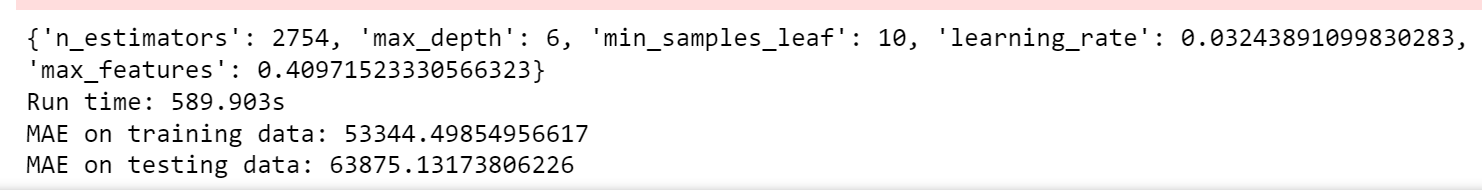